In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
import seaborn as sns
sns.set_style('whitegrid')
from keras.models import  Sequential,load_model
from keras.layers import LSTM,Dense,Dropout

In [ ]:
import os

In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
...,...,...,...,...,...,...,...
6076,1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
6077,1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
6078,1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
6079,1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01


In [ ]:
df = df['Open'].values

In [ ]:
df

array([116.26, 104.55,  85.7 , ...,  26.62,  26.5 ,  26.5 ])

In [ ]:
df.shape

(6081,)

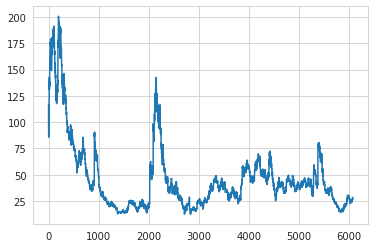

In [ ]:
plt.plot(df)

In [ ]:
df = df.reshape(-1,1)

In [ ]:
df.shape[0]

6081

In [ ]:
df

array([[116.26],
       [104.55],
       [ 85.7 ],
       ...,
       [ 26.62],
       [ 26.5 ],
       [ 26.5 ]])

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [ ]:
dataset_train.shape

(4864, 1)

In [ ]:
dataset_test.shape

(1267, 1)

In [ ]:

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [ ]:
dataset_train

array([[0.55074317],
       [0.4883597 ],
       [0.38793884],
       ...,
       [0.14714187],
       [0.15380108],
       [0.14714187]])

In [ ]:
#50 timestep
def create_dataset(df):
  x = []
  y = []
  for i in range(50,df.shape[0]):
    x.append(df[i-50:i,0])
    y.append(df[i,0])
  x = np.array(x)
  y = np.array(y)
  return x,y

In [ ]:

x_train, y_train = create_dataset(dataset_train)

In [ ]:
x_train

array([[0.55074317, 0.4883597 , 0.38793884, ..., 0.79819935, 0.78360237,
        0.75936285],
       [0.4883597 , 0.38793884, 0.4286932 , ..., 0.78360237, 0.75936285,
        0.76564914],
       [0.38793884, 0.4286932 , 0.38905759, ..., 0.75936285, 0.76564914,
        0.78322945],
       ...,
       [0.17111502, 0.17777423, 0.1737787 , ..., 0.14980555, 0.15113739,
        0.14847371],
       [0.17777423, 0.1737787 , 0.16978318, ..., 0.15113739, 0.14847371,
        0.14714187],
       [0.1737787 , 0.16978318, 0.16978318, ..., 0.14847371, 0.14714187,
        0.15380108]])

In [ ]:
y_train

array([0.76564914, 0.78322945, 0.77065686, ..., 0.14714187, 0.15380108,
       0.14714187])

In [ ]:
x_train.shape

(4814, 50)

In [ ]:
y_train.shape

(4814,)

In [ ]:
x_test,y_test = create_dataset(dataset_test)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(4814, 50, 1)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_test.shape

(1217, 50, 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=96,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

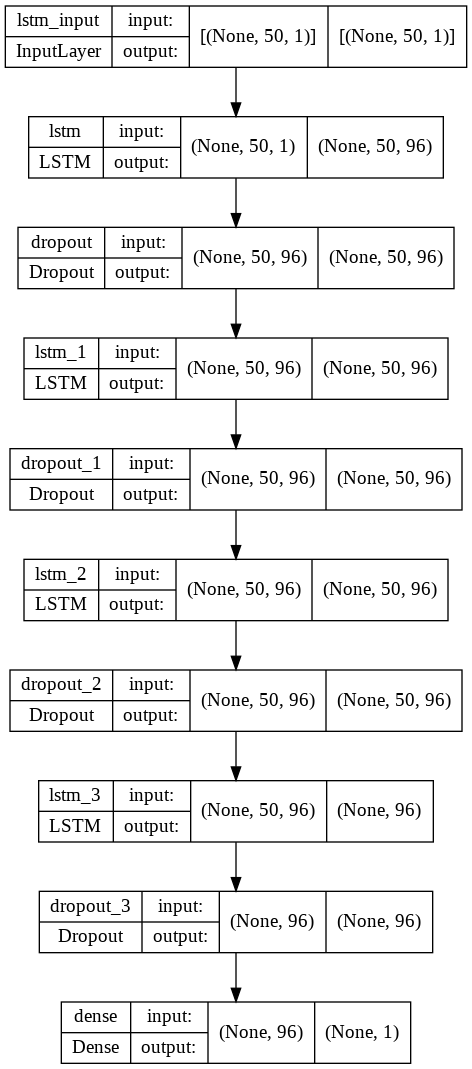

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
151/151 [==============================] - 24s 58ms/step - loss: 0.0038
Epoch 2/10
151/151 [==============================] - 9s 57ms/step - loss: 0.0015
Epoch 3/10
151/151 [==============================] - 9s 57ms/step - loss: 0.0013
Epoch 4/10
151/151 [==============================] - 9s 57ms/step - loss: 0.0011
Epoch 5/10
151/151 [==============================] - 9s 58ms/step - loss: 0.0011
Epoch 6/10
151/151 [==============================] - 9s 57ms/step - loss: 8.5578e-04
Epoch 7/10
151/151 [==============================] - 9s 58ms/step - loss: 9.8440e-04
Epoch 8/10
151/151 [==============================] - 9s 57ms/step - loss: 8.0534e-04
Epoch 9/10
151/151 [==============================] - 9s 57ms/step - loss: 7.9746e-04
Epoch 10/10
151/151 [==============================] - 9s 59ms/step - loss: 8.4195e-04


In [ ]:
predictions = model.predict(x_test)

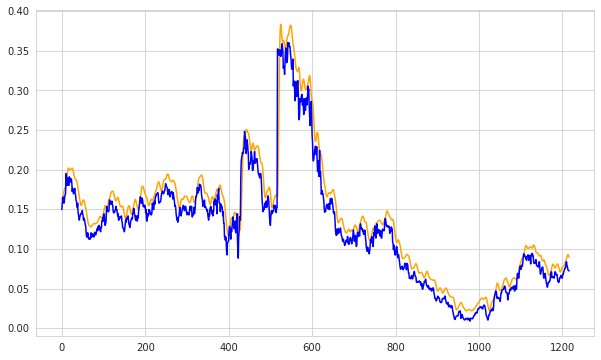

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(predictions,color='orange')
plt.plot(y_test,color='blue')
plt.show()